In [1]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!touch ~/.kaggle/kaggle.json
!echo "{\"username\":\"saqib2\",\"key\":\"9b10e8bffc8887f26aa48f706712c680\"}" > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets  download -d kmader/skin-cancer-mnist-ham10000 -p data/ --force

100% 5.19G/5.20G [00:58<00:00, 133MB/s]
100% 5.20G/5.20G [00:58<00:00, 95.4MB/s]


In [3]:
! sudo unzip  -o data/skin-cancer-mnist-ham10000.zip -d data > /dev/null
! chmod 600 data/HAM10000_metadata.csv

In [4]:
!mkdir data/reorganized

In [5]:
!mv data/HAM10000_images_part_1/*.jpg data
!mv data/HAM10000_images_part_2/*.jpg data

In [6]:
import os
import shutil
import pandas as pd

# Define the root directory where your dataset is currently stored
source_dir = 'data/'

destination_dir = 'data/reorganized/'

# Load your metadata CSV file
metadata = pd.read_csv('data/HAM10000_metadata.csv')

# Iterate through the metadata and move images to class subfolders in the destination directory
for index, row in metadata.iterrows():
    image_filename = row['image_id'] + '.jpg'  # Adjust the file extension if needed
    source_path = os.path.join(source_dir, image_filename)
    destination_subfolder = os.path.join(destination_dir, row['dx'])

    # Create the class subfolder if it doesn't exist in the destination directory
    os.makedirs(destination_subfolder, exist_ok=True)

    # Move the image to the class subfolder in the destination directory
    shutil.move(source_path, os.path.join(destination_subfolder, image_filename))

print("Dataset reorganized into subfolders based on classes in the destination directory:", destination_dir)


Dataset reorganized into subfolders based on classes in the destination directory: data/reorganized/


In [7]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle

# Define the directory where your reorganized dataset is stored
data_dir = 'data/reorganized/'

# Define image dimensions after resizing
target_size = (28, 28)  # Adjust to your desired size

# Initialize lists to store preprocessed images and labels
preprocessed_images = []
labels = []  # List to store class labels

# Loop through subfolders (each subfolder represents a class)
for class_label in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_label)
    if os.path.isdir(class_dir):
        # Load and preprocess images from the subfolder
        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_file)

            # Load the original image
            original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Resize the image
            resized_img = cv2.resize(original_img, target_size)

            # Normalize the image (0 to 1)
            normalized_img = resized_img / 255.0

            # Convert to 8-bit format for median filter
            normalized_img_8bit = (normalized_img * 255).astype(np.uint8)

            # Apply median filter
            median_filtered_img = cv2.medianBlur(normalized_img_8bit, 3)

            # Apply histogram equalization
            equalized_img = cv2.equalizeHist(median_filtered_img)

            # Append the preprocessed image to the list
            preprocessed_images.append(equalized_img)

            # Store the class label
            labels.append(class_label)

# Shuffle the preprocessed images and labels
preprocessed_images, labels = shuffle(preprocessed_images, labels, random_state=42)

# Convert lists to NumPy arrays
preprocessed_images = np.array(preprocessed_images)
labels = np.array(labels)

# Print the number of samples and unique labels
print(f"Number of samples: {len(preprocessed_images)}")
print(f"Unique labels: {np.unique(labels)}")


Number of samples: 10015
Unique labels: ['akiec' 'bcc' 'bkl' 'df' 'mel' 'nv' 'vasc']


In [19]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Define the directory where your reorganized dataset is stored
data_dir = 'data/reorganized/'

# Define image dimensions after resizing
target_size = (28, 28)  # Adjust to your desired size

# Initialize lists to store preprocessed images and labels
preprocessed_images = []
labels = []  # List to store class labels

# Loop through subfolders (each subfolder represents a class)
for class_label in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_label)
    if os.path.isdir(class_dir):
        # Load and preprocess images from the subfolder
        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_file)

            # Load the original image
            original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Resize the image
            resized_img = cv2.resize(original_img, target_size)

            # Normalize the image (0 to 1)
            normalized_img = resized_img / 255.0

            # Convert to 8-bit format for median filter
            normalized_img_8bit = (normalized_img * 255).astype(np.uint8)

            # Apply median filter
            median_filtered_img = cv2.medianBlur(normalized_img_8bit, 3)

            # Apply histogram equalization
            equalized_img = cv2.equalizeHist(median_filtered_img)

            # Append the preprocessed image to the list
            preprocessed_images.append(equalized_img)

            # Store the class label
            labels.append(class_label)
# Convert lists to NumPy arrays
preprocessed_images = np.array(preprocessed_images)
labels = np.array(labels)

# Use LabelEncoder to convert class labels to numerical values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(preprocessed_images, labels_encoded, test_size=0.2, random_state=42)

# Print the number of samples and unique labels
print(f"Number of samples: {len(preprocessed_images)}")
print(f"Unique labels: {np.unique(labels_encoded)}")


Number of samples: 10015
Unique labels: [0 1 2 3 4 5 6]


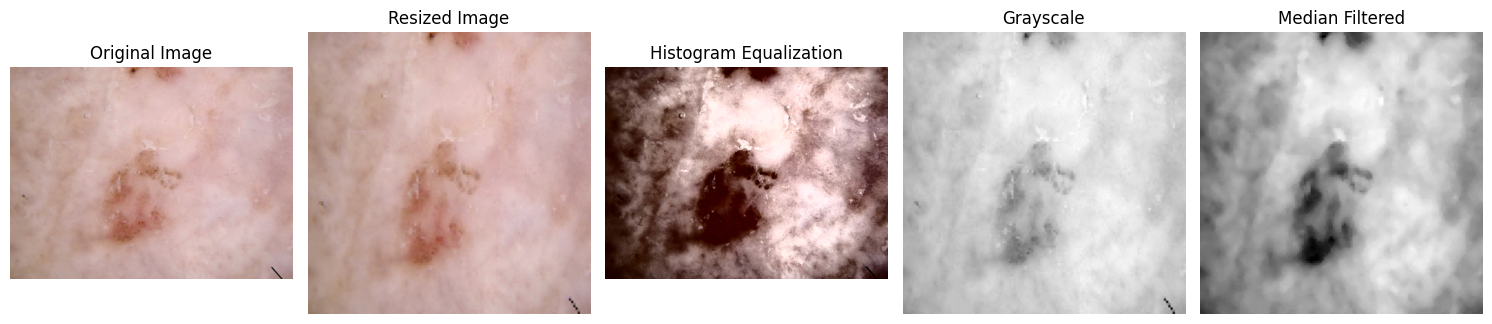

In [13]:
import cv2
import matplotlib.pyplot as plt

# Define the path to the example image
image_path = '/content/data/reorganized/akiec/ISIC_0024329.jpg'

# Load the original image
original_image = cv2.imread(image_path)

# Apply histogram equalization to the original color image
equalized_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2YUV)
equalized_image[:, :, 0] = cv2.equalizeHist(equalized_image[:, :, 0])
equalized_image = cv2.cvtColor(equalized_image, cv2.COLOR_YUV2BGR)

# Resize the image
target_size = (128, 128)  # Adjust to your desired size
resized_image = cv2.resize(original_image, target_size)

# Convert the resized image to grayscale
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Apply a median filter to the grayscale image
kernel_size = 3  # Adjust the kernel size as needed
median_filtered_image = cv2.medianBlur(gray_image, kernel_size)

# Normalize the resized image (0 to 1)
normalized_image = resized_image / 255.0

# Create a figure to display the images
plt.figure(figsize=(18, 6))

# Display the original image
plt.subplot(1, 6, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Display the resized image
plt.subplot(1, 6, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title("Resized Image")
plt.axis('off')

# Display the histogram equalized image
plt.subplot(1, 6, 3)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title("Histogram Equalization")
plt.axis('off')

# Display the grayscale image
plt.subplot(1, 6, 4)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

# Display the median filtered grayscale image
plt.subplot(1, 6, 5)
plt.imshow(median_filtered_image, cmap='gray')
plt.title("Median Filtered")
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()


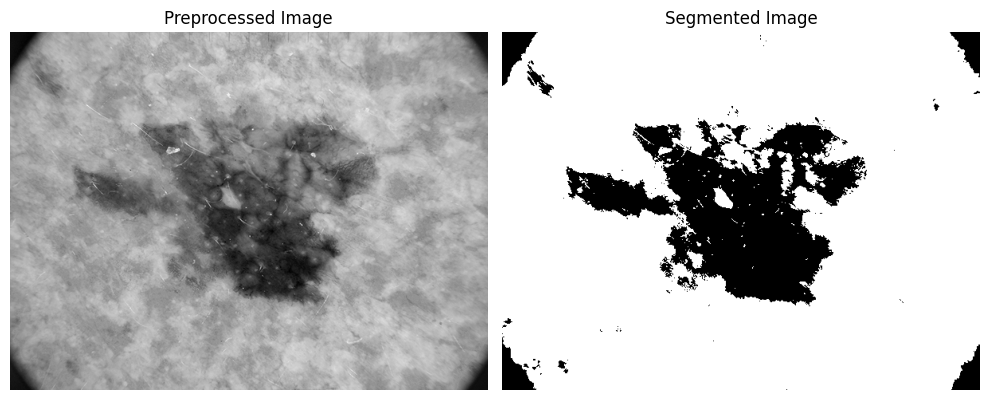

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a preprocessed image (you can replace this with your preprocessed image)
preprocessed_image = cv2.imread('/content/data/reorganized/mel/ISIC_0024310.jpg', cv2.IMREAD_GRAYSCALE)

# Apply thresholding to segment the lesion from the background
# Adjust the threshold value as needed for your specific images
threshold_value = 128  # You can experiment with different threshold values
_, segmented_image = cv2.threshold(preprocessed_image, threshold_value, 255, cv2.THRESH_BINARY)

# Create a figure to display the original preprocessed image and the segmented result
plt.figure(figsize=(10, 5))

# Display the original preprocessed image
plt.subplot(1, 2, 1)
plt.imshow(preprocessed_image, cmap='gray')
plt.title("Preprocessed Image")
plt.axis('off')

# Display the segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Image")
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()


In [20]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)

# Reshape the preprocessed images for SMOTE
X_resampled, y_resampled = smote.fit_resample(preprocessed_images.reshape(-1, np.prod(target_size)), labels_encoded)

# Reshape back to the original image dimensions
X_resampled = X_resampled.reshape(-1, *target_size)


In [21]:
import numpy as np

# Count the occurrences of each unique label in y_resampled
unique_labels, label_counts = np.unique(y_resampled, return_counts=True)

# Print the label and corresponding count
for label, count in zip(unique_labels, label_counts):
    print(f"Label {label}: {count} samples")

Label 0: 6705 samples
Label 1: 6705 samples
Label 2: 6705 samples
Label 3: 6705 samples
Label 4: 6705 samples
Label 5: 6705 samples
Label 6: 6705 samples


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np

# Define the modified ResNet-34 model without the final classifier layers
class ResNet34FeatureExtractor(nn.Module):
    def __init__(self):
        super(ResNet34FeatureExtractor, self).__init__()
        resnet34 = models.resnet34(pretrained=True)
        self.features = nn.Sequential(*list(resnet34.children())[:-2])  # Remove final layers

    def forward(self, x):
        return self.features(x)

# Define a custom dataset to load your data
class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img = self.data[idx]

        if self.transform:
            img = self.transform(img)

        label = self.labels[idx]
        return img, label

# Define a data transformation for the ResNet-34 model
transform = transforms.Compose([
    transforms.ToPILImage(),  # Convert to PIL Image
    transforms.Grayscale(num_output_channels=3),  # Convert to RGB-like image
    transforms.Resize((28, 28)),  # Resize to match the input size used in preprocessing and SMOTE
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Create a DataLoader for your resampled dataset
dataset = CustomDataset(X_resampled, y_resampled, transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=False)

# Initialize the ResNet-34 feature extractor
feature_extractor = ResNet34FeatureExtractor()

# Extract features from your dataset
all_features = []
all_labels = []

with torch.no_grad():
    for batch in dataloader:
        images, labels = batch
        features = feature_extractor(images)
        all_features.append(features)
        all_labels.append(labels)

# Concatenate features and labels from all batches
all_features = torch.cat(all_features, dim=0)
all_labels = torch.cat(all_labels, dim=0)

# Now, all_features contains the extracted features of your balanced dataset,
# and all_labels contains the corresponding labels.
print("Extracted features shape:", all_features.shape)
print("Labels shape:", all_labels.shape)


Extracted features shape: torch.Size([46935, 512, 1, 1])
Labels shape: torch.Size([46935])


In [22]:
# Import the necessary module for image data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator for training data with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,            # Rescale pixel values to the range [0, 1]
    rotation_range=10,         # Randomly rotate images by up to 10 degrees
    zoom_range=0.1,            # Randomly zoom images by up to 10%
    width_shift_range=0.1,     # Randomly shift the width of images by up to 10%
    height_shift_range=0.1     # Randomly shift the height of images by up to 10%
)

# Create a data generator for testing data with rescaling only
testgen = ImageDataGenerator(
    rescale=1./255             # Rescale pixel values to the range [0, 1]
)

In [23]:
# Import the 'ReduceLROnPlateau' callback from Keras
from keras.callbacks import ReduceLROnPlateau

# Create a 'ReduceLROnPlateau' callback
# This callback monitors the validation accuracy during training and reduces the learning rate if necessary.
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',   # Metric to monitor (validation accuracy in this case)
    patience=2,               # Number of epochs with no improvement before reducing the learning rate
    verbose=1,                # Verbosity mode (1: update messages, 0: no messages)
    factor=0.5,               # Factor by which the learning rate will be reduced (new_lr = old_lr * factor)
    min_lr=0.00001            # Lower bound for the learning rate
)


In [27]:
# Import necessary layers and modules from TensorFlow's Keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, Adamax
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
# Define a function 'get_model' to create and return the CNN model
def get_model():
    m = Sequential()

    # Input layer for images of shape [28, 28, 3]
    m.add(Input(shape=[28, 28, 1]))

    # Convolutional Layer 1
    m.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    m.add(MaxPooling2D())
    m.add(BatchNormalization())

    # Convolutional Layer 2 and Layer 3
    m.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    m.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    m.add(MaxPooling2D())
    m.add(BatchNormalization())

    # Convolutional Layer 4 and Layer 5
    m.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    m.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    m.add(MaxPooling2D())
    m.add(BatchNormalization())

    # Convolutional Layer 6 and Layer 7
    m.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    m.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
    m.add(MaxPooling2D())

    # Flatten the feature maps
    m.add(Flatten())

    # Dropout layer
    m.add(Dropout(rate=0.2))

    # Fully Connected Layer 1
    m.add(Dense(units=256, activation='relu', kernel_initializer='he_normal'))
    m.add(BatchNormalization())

    # Fully Connected Layer 2
    m.add(Dense(units=128, activation='relu', kernel_initializer='he_normal'))
    m.add(BatchNormalization())

    # Fully Connected Layer 3
    m.add(Dense(units=64, activation='relu', kernel_initializer='he_normal'))
    m.add(BatchNormalization())

    # Fully Connected Layer 4 with L1L2 regularization
    m.add(Dense(units=32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.L1L2()))

    # Fully Connected Layer for classification with 7 units (7 classes)
    m.add(Dense(units=7, activation='softmax', kernel_initializer='glorot_uniform', name='classifier'))

    # Compile the model with the Adamax optimizer, categorical cross-entropy loss, and accuracy metric
    m.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return m

# Create an instance of the CNN model using the 'get_model' function
m = get_model()
# Display a summary of the model's architecture
m.summary()
# Compile the model
m.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
history = m.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), callbacks=[learning_rate_reduction])

# Evaluate the model on the test set
test_loss, test_accuracy = m.evaluate(X_test, y_test)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Save the trained model
m.save('skin_cancer_cnn_model.h5')


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_18 (Ba  (None, 14, 14, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 64)         

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
# Define a function 'plot_training' for visualizing training and validation metrics
def plot_training(h):
    # Extract training and validation metrics from the history object 'h'
    tr_acc = h.history['accuracy']
    tr_loss = h.history['loss']
    val_acc = h.history['val_accuracy']
    val_loss = h.history['val_loss']

    # Find the index of the epoch with the lowest validation loss and the corresponding value
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]

    # Find the index of the epoch with the highest validation accuracy and the corresponding value
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    # Create a figure with two subplots (for loss and accuracy)
    plt.figure(figsize=(20, 8))
    plt.style.use('fivethirtyeight')

    # Define the epochs for the x-axis
    Epochs = [i+1 for i in range(len(tr_acc))]

    # Labels for highlighting best epochs
    loss_label = f'best epoch = {str(index_loss + 1)}'
    acc_label = f'best epoch = {str(index_acc + 1)}'

    # Subplot for loss
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label='Training loss')
    plt.plot(Epochs, val_loss, 'g', label='Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Subplot for accuracy
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
    plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Ensure proper layout and display the plot
    plt.tight_layout()
    plt.show()

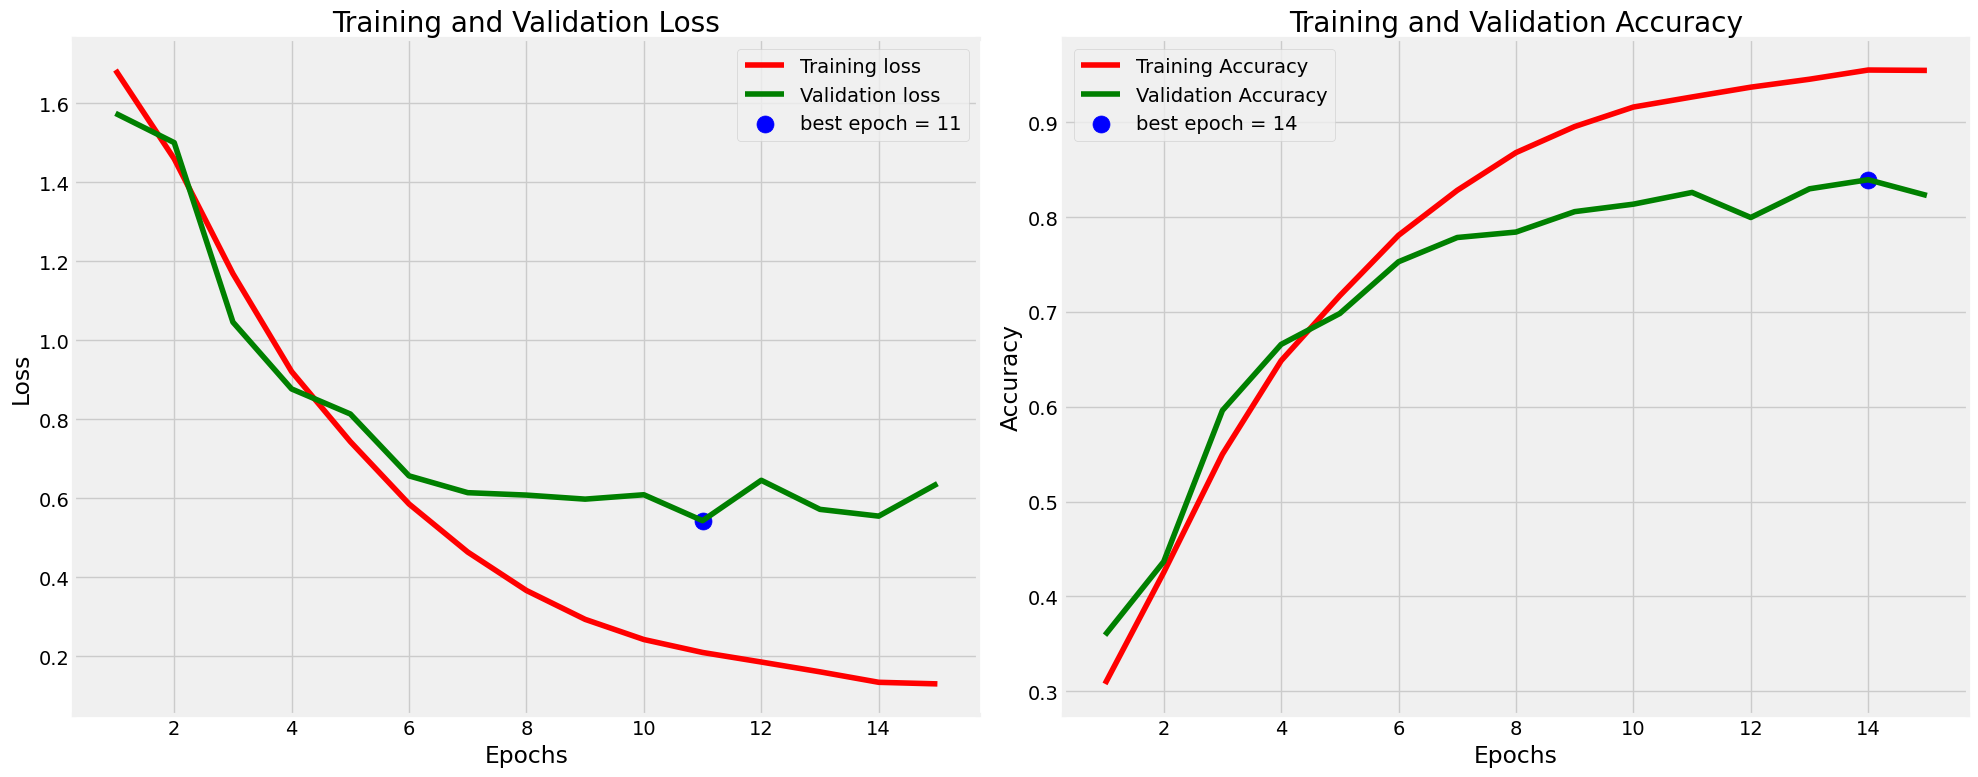

In [29]:
plot_training(history)

133/133 [==============================] - 7s 50ms/step


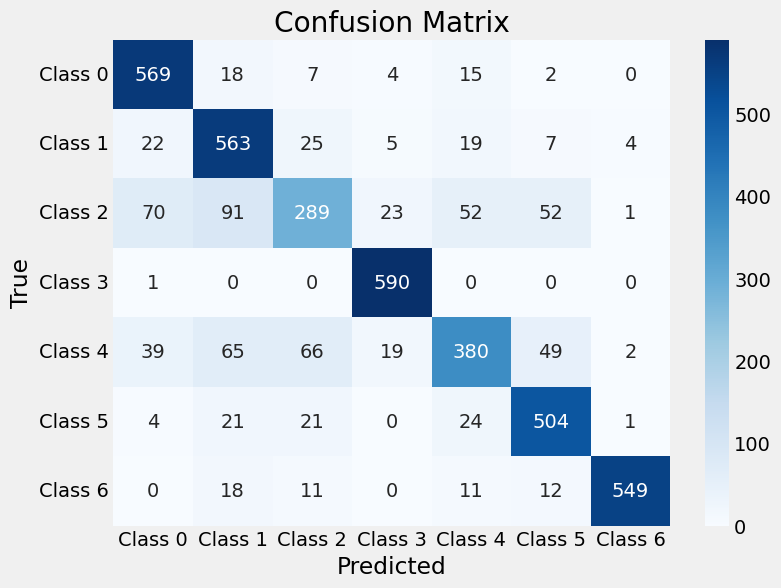

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict classes on the test set
y_pred = m.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Define class labels (if you have them)
class_labels = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6"]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [31]:
from sklearn.metrics import classification_report

# Use the trained model to make predictions on the test set
y_pred = m.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the classification report
class_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6"]

report = classification_report(y_test, y_pred_classes, target_names=class_names)

# Print the classification report
print(report)


133/133 [==============================] - 8s 61ms/step
              precision    recall  f1-score   support

     Class 0       0.81      0.93      0.86       615
     Class 1       0.73      0.87      0.79       645
     Class 2       0.69      0.50      0.58       578
     Class 3       0.92      1.00      0.96       591
     Class 4       0.76      0.61      0.68       620
     Class 5       0.81      0.88      0.84       575
     Class 6       0.99      0.91      0.95       601

    accuracy                           0.82      4225
   macro avg       0.81      0.81      0.81      4225
weighted avg       0.81      0.82      0.81      4225



In [32]:
# Evaluate the model on the training data and store the evaluation results in 'train_score'
train_score = m.evaluate(X_train, y_train, verbose=1)

# Evaluate the model on the testing data and store the evaluation results in 'test_score'
test_score = m.evaluate(X_test, y_test, verbose=1)

# Print the evaluation results for the training dataset
print("Train Loss: ", train_score[0])      # Training loss
print("Train Accuracy: ", train_score[1])  # Training accuracy
print('-' * 20)  # Print a separator line

# Print the evaluation results for the testing dataset
print("Test Loss: ", test_score[0])        # Testing loss
print("Test Accuracy: ", test_score[1])    # Testing accuracy

133/133 [==============================] - 6s 43ms/step - loss: 0.6808 - accuracy: 0.8151
Train Loss:  0.10387618094682693
Train Accuracy:  0.9644360542297363
--------------------
Test Loss:  0.6808007955551147
Test Accuracy:  0.8151479363441467


In [37]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from tensorflow.keras.models import load_model

# Load your pre-trained CNN model
cnn_model = load_model('skin_cancer_cnn_model.h5')  # Replace with the path to your model file

# Define the directory where your preprocessed dataset is stored
data_dir = 'data/reorganized/'

# Define image dimensions after resizing
target_size = (28, 28)  # Adjust to your desired size

# Initialize lists to store preprocessed images and labels
preprocessed_images = []
labels = []  # List to store class labels

# Loop through subfolders (each subfolder represents a class)
for class_label in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_label)
    if os.path.isdir(class_dir):
        # Load and preprocess images from the subfolder
        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_file)

            # Load the original image
            original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Resize the image
            resized_img = cv2.resize(original_img, target_size)

            # Normalize the image (0 to 1)
            normalized_img = resized_img / 255.0

            # Convert to 8-bit format for median filter
            normalized_img_8bit = (normalized_img * 255).astype(np.uint8)

            # Apply median filter
            median_filtered_img = cv2.medianBlur(normalized_img_8bit, 3)

            # Apply histogram equalization
            equalized_img = cv2.equalizeHist(median_filtered_img)

            # Append the preprocessed image to the list
            preprocessed_images.append(equalized_img)

            # Store the class label
            labels.append(class_label)

# Convert lists to NumPy arrays
preprocessed_images = np.array(preprocessed_images)
labels = np.array(labels)

# Use LabelEncoder to convert class labels to numerical values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Reshape the preprocessed images to match the input shape of the CNN model
preprocessed_images = preprocessed_images.reshape(-1, *target_size, 1)

# Extract features from your CNN model
cnn_features = cnn_model.predict(preprocessed_images)

# Flatten the feature vectors
cnn_features_flattened = cnn_features.reshape(cnn_features.shape[0], -1)

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(cnn_features_flattened, labels_encoded, test_size=0.2, random_state=42)

# Train an SVM classifier (you can choose the type of SVM and parameters)
svm_classifier = svm.SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

# Evaluate the SVM classifier on the test set
svm_accuracy = svm_classifier.score(X_test, y_test)

print(f'SVM Classifier Accuracy: {svm_accuracy * 100:.2f}%')


313/313 [==============================] - 16s 51ms/step
SVM Classifier Accuracy: 90.16%


In [51]:
# ...

# Extract features from your CNN model
cnn_features = cnn_model.predict(preprocessed_images)

# Flatten the feature vectors
cnn_features_flattened = cnn_features.reshape(cnn_features.shape[0], -1)

# Do not reshape the feature vectors back to 2D
# preprocessed_images = preprocessed_images.reshape(-1, *target_size, 1)

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(cnn_features_flattened, labels_encoded, test_size=0.2, random_state=42)

# Train an SVM classifier (you can choose the type of SVM and parameters)
svm_classifier = svm.SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

# Evaluate the SVM classifier on the test set
svm_accuracy = svm_classifier.score(X_test, y_test)

# Calculate the training accuracy
train_accuracy = svm_classifier.score(X_train, y_train)

# Print training and test accuracies
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {svm_accuracy * 100:.2f}%')

# Calculate the classification report
y_pred = svm_classifier.predict(X_test)
report = classification_report(y_test, y_pred, target_names=class_labels)

# Print the classification report
print(report)


313/313 [==============================] - 16s 52ms/step
Train Accuracy: 91.45%
Test Accuracy: 90.16%
              precision    recall  f1-score   support

       akiec       0.81      0.96      0.88        69
         bcc       0.76      0.97      0.85        97
         bkl       0.88      0.75      0.81       227
          df       1.00      1.00      1.00        24
         mel       0.87      0.72      0.79       230
          nv       0.93      0.95      0.94      1332
        vasc       0.87      0.83      0.85        24

    accuracy                           0.90      2003
   macro avg       0.87      0.88      0.87      2003
weighted avg       0.90      0.90      0.90      2003



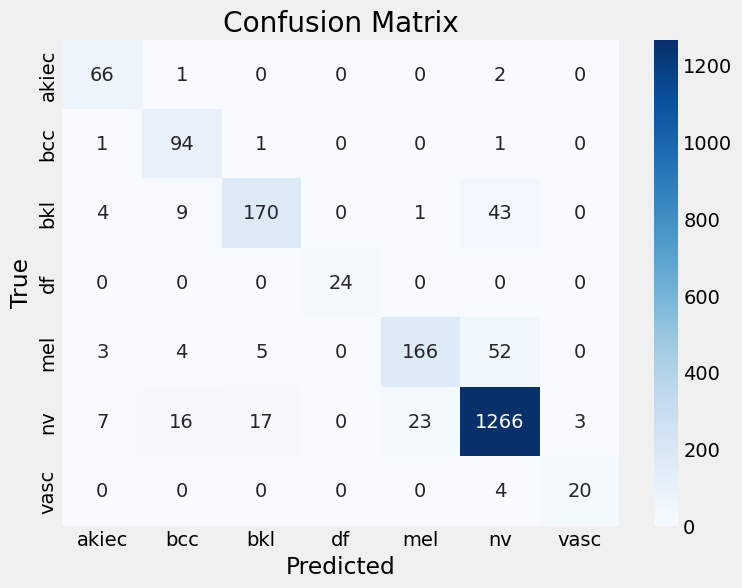

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained and evaluated your SVM classifier
# svm_classifier = ...

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Define class labels (modify as needed)
class_labels = np.unique(labels)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()
